# **Computer Vision Systems Homework**

**Dear fellow engineers!**

The nice people of Sim City would like to welcome you in their humble town, which is built entirely from environmentally friendly, recyclable triangles and pixels. In their most recent town meeting, the people decided that it was time for Sim City to adopt self-driving vehicles, since apparently, they are all the craze in the real world. 

However, the people are worried that accidents caused by these cars would significantly increase the computational resources used by Sim City due to an increased respawn rate. Therefore, the good people of Sim City need **you** to develop an algorithm that can reliably detect and track all relevant objects around the vehicles.

## **Basics**

As mentioned before, your task is to develop an algorithm that can perform detection, tracking and segmentation tasks on synthetic images created using the [CARLA simulator](https://carla.org/). There are seven videos in total, all annotated with the correct results for most tasks. 

Your job is to develop algorithms that attempt to find the correct results for all images and then compare the results of your method with the correct answers. From this comparison you can calculate the average error or the average accuracy of your method. Since object detection in autonomous driving settings is a real-time task, you also need to evaluate the speed of your algorithm.

## The setting

The videos in the provided dataset are saved frame-by-frame, meaning for every frame your have access to the following data:

* **Inputs:**
    1. RGB frame (located in "carla_images/rgb/[video_index]/[frame_number].jpg" )
    2. Depth frame (located in "carla_images/depth/[video_index]/[frame_number].png" ) This frame is the same size az the RGB frame, but contains the distance of the pixels from the camera in cm.
    3. The example below contains the camera matrix values that you can use for converting [x, y, depth] points to 3D coordinates. Look up the pinhole camera equations below for help.
* **Outputs:**
    1. Freespace image (located in "carla_images/seg/[video_index]/fs_[frame_number].png" ) This is a binary image, were all the road pixels are 1, the rest is 0.
    2. Semantic segmentation image (located in "carla_images/seg/[video_index]/[frame_number].png" ) A color image, showing the semantic label of each image. To use this with deep neural networks, first it has to be converted into a format, where the pixels are the semantic labels, not colors. This means the pixel values have to correspond to the specific label values that the given neural network uses.
    3. Bounding box annotations (located in "carla_images/annotation/[video_index]/[frame_number]_.txt" ) This is a text file, where every row contains a detectable object (detectable objects are 0:cars, 1:trucks, 2:motorcycles, 3:bicycles, 4:pedestrians). The values of the detection are as follows: [class_index, BB_x, BB_y, BB_w, BB_h, BB3D_x1, BB3D_x2, BB3D_y1, BB3D_y2, BB3D_z1, BB3D_z2]. Below, you can find an example using these values.
    4. The self-motion of the vehicle (located in "carla_images/annotation/[video_index]/[frame_number]_.npy" ) A binary file containing the matrix describing the 6DOF rigid transformation of the car relative to its position in the previous frame.

## Tasks

Using the datasets provided, you have to perform the following tasks:

1. **2D Object Detection:** This task can be done with or without neural networks. You simply have to detect all 5 object types, provide accurate bounding boxes and class labels. You can initially use a pre-trained neural net, but for really great results it is recommended that you fine-tune using your own data (don't forget to do a train-validation split). You can also try and enhance the network performance by adding depth as an extra channel (note: this is difficult).

2. **3D Object Detection:** This tasks has to be done **without** neural nets. Use the results of the 2D tasks (if not completed yet, you can use the correct outputs in the meanwhile) to compute the object locations in 3D relative to the car. Also try and track the objects on multiple frames and try to determine their velocity.

3. **Semantic Segmentation:** Use a neural network to perform semantic segmentation on the RGB images. You can initially use a pre-trained network, but it is also recommended that you fine-tune using your own data, just like in the first task. Similarly, you can add the depth image as an extra feature either as an input channel, or as an input to the last layer (note: this is considerably easier to do here than in the first case).

4. **Freespace Segmentation:** Use traditional methods (meaning you **can't** use neural nets here) to find pixels belonging to the road. Note, that the car is always in a fixed position and orientation relative to the ground plane, so this task is relatively easy to do using simply 3D geometry (simplified RANSAC-like methods).

**Important**

Each of the tasks described here is pretty hard, meaning you won't be able to do all of them perfectly. So your job is to do as many of these as you can, as well as you can.

## Evaluation

Your job is also to evaluate the reliability of your own algorithms. Here are some tips:

1. If your train/fine-tune methods, make sure you always use a train-validation split. There are 9 videos in total, so 7-2 or 6-3 is reasonable. The individual videos are under different conditions (day/night, sunshine/rain, etc.), so make your both sets include a wide range of conditions.
2. To measure the accuracy of your predicted 2D or 3D bounding boxes, the IoU (Intersection over Union) metric is recommended.
3. A detection is accurate if the IoU is high enough and a class label is correct. To measure the performance of 2D detection, there are several useful metrics: Precision, Recall, F1-Score and mAP (mean Average Precision).
4. For the segmentation-like tasks, pixel accuracy is the simplest metric (the % of pixels classified correctly), but it is not very good. I recommend that you use the IoU metric (first IoU values are computed for every class, and then averaged).
5. For evaluating the speed of the methods, you can use the average time for processing a single frame. If you use tricks, where you only do certain computations for the first frame, then you can exclude the first frame from the average.

## **Submission and Presentation**

In the retake week (23.-27. May) there will be a special session, where the teams **give a short (10 minutes) presentation** about the work they completed. The presentation should focus on the method used and the results achieved. The teams will also have to **submit their code and a short (10-15 page) report** by the end of the retake week. 

The offered grade will be decided by a panel of lecturers involved in the course after hearing the presentation and inspecting the code and the report. Note, that in the case of a very low-quality submission, we may decide not to give an offered grade (this means you will have to take the final exam).

Truly high quality homeworks can be carried on as individual research subjects for the Students' Scientific Conference (TDK).

## Rules

Here are some important rules and guidelines you have to follow:

*   This work is to be done in groups of 4 people. You can do it with less if you feel confident, but not more.
*   Forming/finding a group is your job. Once you have one, 1 person from the group should write me a message on teams with the names and Neptun codes of the members.
*   You can opt out of the homework later. In this case you will need to take the midterm exam. If you signed up for the homework and then decide to opt out, let me know ASAP.

## So, how should we do this?

So, how can you do this homework, especially if you haven't done things like this before? Here are a few tips:

### Environment

For development IDE the easiest is to just use Google Colab. To do this you just have to solve the homework inside this notebook. This is the simplest solution, although it has one drawback: the Colab notebook has limited debugging capabilities.

If you want something more powerful, I recommend the [PyCharm](https://www.jetbrains.com/pycharm/) IDE, which is a free and pretty powerful Python development tool.

If you are planning to use PyCharm on Windows, you need to install a Python distribution, since Windows still doesn't come with one (it's 20 effing 22, Microsoft!). I recommend [Anaconda](https://www.anaconda.com/distribution/). Make sure you use Python 3.x and not 2.7.

[Here's a tutorial on how to set it up.](https://www.youtube.com/watch?v=e53lRPmWrMI)

### Collaboration within the team

Since I would strongly discourage teams to collaborate physically in the current situation, I'd like to recommend some methods for remote collaboration.

* First of all, use git or a similar version control tool to handle multiple team members working on the same project. 
* I strongly recommend creating a private repository for your homework on [Github](https://github.com/) (since you can add exactly 3 collaborators - including you that's a 4-person team). There, you can also create issues and other nice-to-have features to track your development. Getting some experience with version control is an absolute must for any engineer anyways.

Here's a tutorial for git for those who never used something like this before.

To use git from a GUI, I recommend [SmartGit](https://www.syntevo.com/smartgit/) or [Git Extensions](http://gitextensions.github.io/).

**ProTip:** If you use a Colab notebook, make sure to clear the output cells (especially figures and images) before you commit. Otherwise you'll litter in your repository.

[Here is an introduction to git](https://www.freecodecamp.org/news/learn-the-basics-of-git-in-under-10-minutes-da548267cc91/)

### Further resources

As this course uses the Python language, I highly recommend that you also use this language to do your homework. Here are some resources to get you started (Note: the practicals will also provide you with many of the basics, but they are still a few weeks away):

[Python tutorials](https://docs.python.org/3/tutorial/)

OpenCV: For basic computer vision and image processing

[OpenCV tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)

PyTorch: For deep learning

[PyTorch tutorials](https://pytorch.org/tutorials/)




# Solution
## Download dataset

In [1]:
# Homework dataset
!wget https://deeplearning.iit.bme.hu/Public/Carla_Videos.zip --no-check-certificate
!unzip -qq Carla_Videos.zip
!rm Carla_Videos.zip

--2022-05-25 12:31:56--  https://deeplearning.iit.bme.hu/Public/Carla_Videos.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 547880046 (522M) [application/zip]
Saving to: ‘Carla_Videos.zip’

Carla_Videos.zip    100%[===================>] 522.50M  20.0MB/s    in 33s     

2022-05-25 12:32:33 (15.6 MB/s) - ‘Carla_Videos.zip’ saved [547880046/547880046]
























































Get all files with extension in a directory

```
import glob
import re

def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)

names = sorted_nicely(glob.glob1(path, "*.extension"))
```


## Pinhole camera equations

This small example shows the relationship between the world coordinates $[x, y, z]$ and the projected image coordinates $[u, v]$ depending on the values in the camera matrix $A$.

$$u = f_x\frac{x}{z} + p_x$$

$$v = f_y\frac{-y}{z} + p_y$$

$$A = \begin{bmatrix} f_x & 0 & p_x \\ 0 & f_y & p_y \\ 0 & 0 & 1 \end{bmatrix}$$

### Display the first images

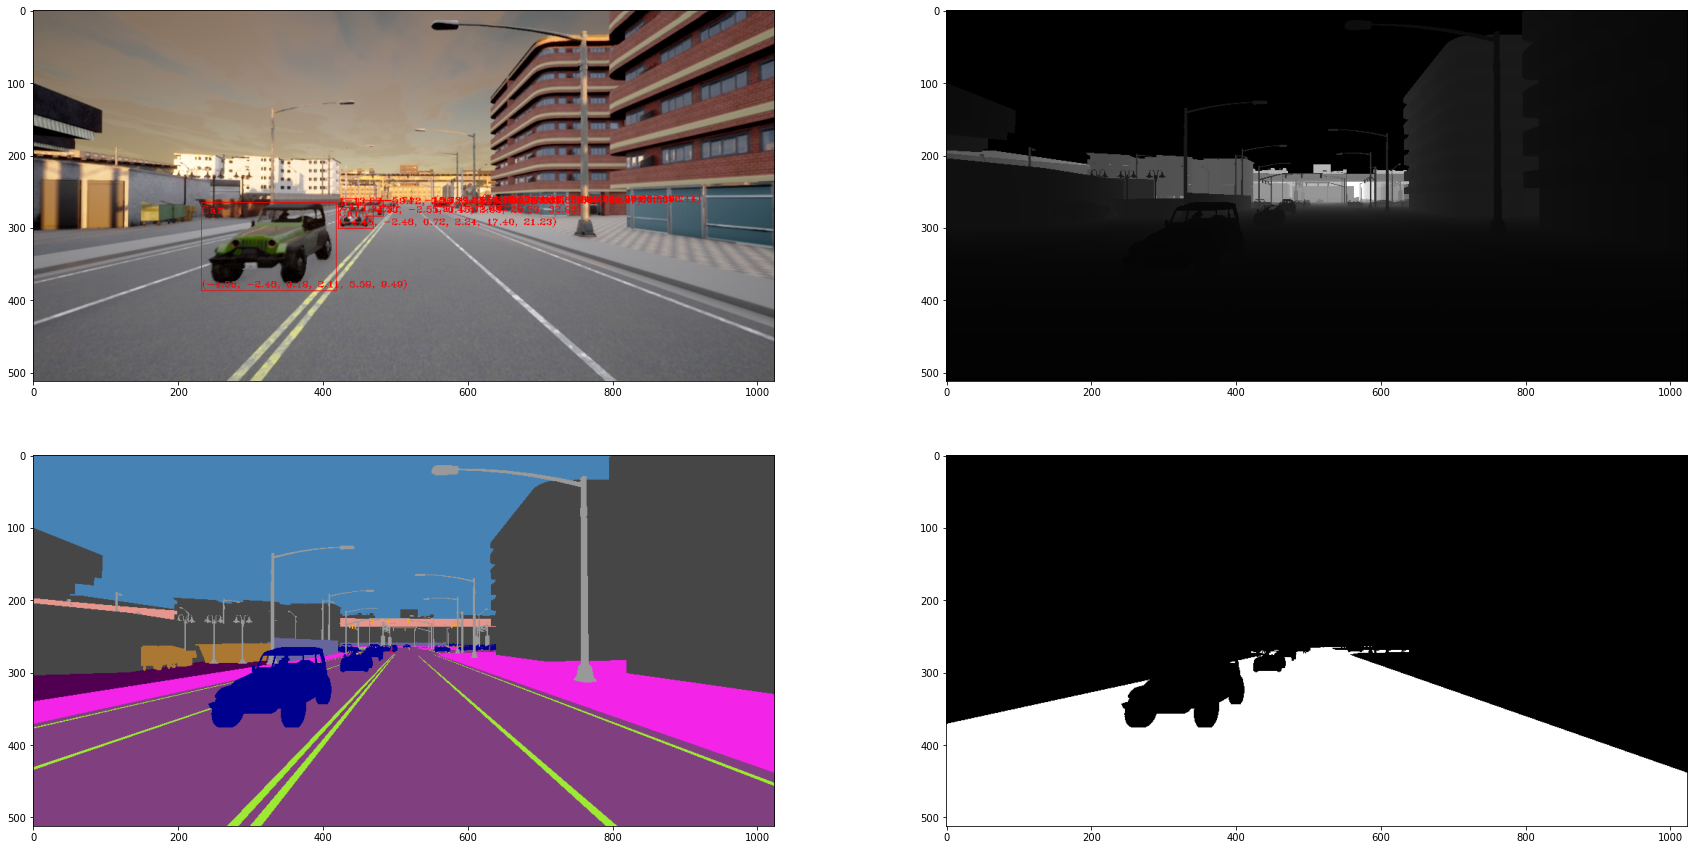

In [2]:
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np
#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

cam_mtx = np.array([
    [358.5, 0.0,   512.0],
    [0.0,   358.5, 256.0],
    [0.0,   0.0,   1.0],
    
])

colors = [(0,0,255), (0,255,0), (255,0,255), (0,255,255), (255,0,0)]
classNames = ["Car", "Truck", "Motorcycle", "Bicycle", "Pedestrian"]

'''
The key element of this dictionary is the semantic ID of a class you can use with
neural networks, while the value is the RGB color used in the images.
'''
semSegClasses = {  
     0: [0, 0, 0],         # None 
     1: [70, 70, 70],      # Buildings 
     2: [190, 153, 153],   # Fences 
     3: [72, 0, 90],       # Other 
     4: [220, 20, 60],     # Pedestrians 
     5: [153, 153, 153],   # Poles 
     6: [157, 234, 50],    # RoadLines 
     7: [128, 64, 128],    # Roads 
     8: [244, 35, 232],    # Sidewalks 
     9: [107, 142, 35],    # Vegetation 
     10: [0, 0, 255],      # Vehicles 
     11: [102, 102, 156],  # Walls 
     12: [220, 220, 0]     # TrafficSigns 
 } 

def drawBBs(BBs, img):
    H, W = img.shape[:2]
    for BB in BBs:
        u = BB[1]*W
        v = BB[2]*H
        w = BB[3]*W
        h = BB[4]*H
        c = int(BB[0])
        x_min = BB[5]
        x_max = BB[6]
        y_min = BB[7]
        y_max = BB[8]
        z_min = BB[9]
        z_max = BB[10]
        s = (int(u - w // 2), int(v - h // 2))
        e = (int(u + w // 2), int(v + h // 2))
        cv2.rectangle(img, s, e, colors[c], 1)
        tl = (s[0], s[1]+15)
        bl = (s[0], e[1]-5)
        cv2.putText(img,classNames[c],tl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,colors[c])
        coords = "(%.2f, %.2f, %.2f, %.2f, %.2f, %.2f)" % (x_min, x_max, y_min, y_max, z_min, z_max)
        cv2.putText(img,coords,bl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.65,colors[c])
    
    return img

# Read images
img = cv2.imread("carla_images/rgb/000/00.jpg")
depth = cv2.imread("carla_images/depth/000/00.png", -1)
seg = cv2.imread("carla_images/seg/000/00.png")
fs = cv2.imread("carla_images/seg/000/fs_00.png", -1)

# Read annotations
labels = np.loadtxt("carla_images/annotation/000/00_.txt")
pos = np.load("carla_images/annotation/000/00_.npy").reshape((4,4))

# Visualization
img = drawBBs(labels, img)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
seg_rgb = cv2.cvtColor(seg,cv2.COLOR_BGR2RGB)

# Figure with subplots
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.subplot(2,2,2)
plt.imshow(depth,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(seg_rgb)
plt.subplot(2,2,4)
plt.imshow(fs,cmap='gray')

# Your Work

In [3]:
# KÉRDÉS: Ha nem tökéletes a szegmentálás akkor hogy döntöm el, hogy az adott pont tényleg rajta van-e az objektumon vagy sem?
# ÖTLET: Legnagyobb N távolság mértani (vagy másféle) közepe kiszámít -> Ha ettől nagyon eltér, akkor a háttérben van. 
# (Pl.: tesztelés alatt volt olyan, hogy autó legtávolabbi pontja 9,5 méterre volt, de közvetlenül mögötte pedig egy fal kb. 50 méterre) 

import time

'''
def image_to_world(u, v, depth):
  px = cam_mtx[0][2]
  py = cam_mtx[1][2]
  fx = cam_mtx[0][0]
  fy = cam_mtx[1][1]
  x = depth * (u - px) / fx
  y = depth * (v - py) / fy
  return x, y

def world_to_image(x, y, depth):
  px = cam_mtx[0][2]
  py = cam_mtx[1][2]
  fx = cam_mtx[0][0]
  fy = cam_mtx[1][1]
  u = int(fx * x / depth + px)
  v = int(fy * y / depth + py)
  return u, v
'''

px = cam_mtx[0][2]
py = cam_mtx[1][2]
fx = cam_mtx[0][0]
fy = cam_mtx[1][1]
inv_cam_mtx = np.array([
    [1/fx,  0.0,  -px*(1/fx)],
    [0.0,   1/fy, -py*(1/fy)],
    [0.0,   0.0,   1.0],  
])

def image_to_world(u, v, depth):
  im_coord = np.array([depth*u, depth*v, depth])
  result = np.matmul(inv_cam_mtx, im_coord)
  return result[0], result[1]

def world_to_image(x, y, depth):
  wrd_coord = np.array([x, y, depth])
  result = np.matmul(cam_mtx, wrd_coord)
  return round(result[0]/result[2]), round(result[1]/result[2])

def BB_to_image(BB, img):
  H, W = img.shape[:2]
  u = int(BB[1] * W)
  v = int(BB[2] * H)
  w = int(BB[3] * W)
  h = int(BB[4] * H)
  return u, v, w, h

def BB_edge_points(BB, img):
  u, v, w, h = BB_to_image(BB, img)
  start_x = max(int(u - w // 2), 0)
  start_y = max(int(v - h // 2), 0)
  end_x = min(int(u + w // 2), img.shape[1])
  end_y = min(int(v + h // 2), img.shape[0])
  return (start_x, start_y), (end_x, end_y)


In [4]:
import os

annotation_path = "carla_images/annotation/"
depth_path = "carla_images/depth/"
rgb_path = "carla_images/rgb/"
seg_path = "carla_images/seg/"

videos = sorted(os.listdir(annotation_path))

annotation_files_txt = [sorted([os.path.join(annotation_path, video, file) for file in os.listdir(os.path.join(annotation_path, video)) if file.endswith(".txt")]) for video in videos]
annotation_files_npy = [sorted([os.path.join(annotation_path, video, file) for file in os.listdir(os.path.join(annotation_path, video)) if file.endswith(".npy")]) for video in videos]
depth_files = [sorted([os.path.join(depth_path, video, file) for file in os.listdir(os.path.join(depth_path, video))]) for video in videos]
rgb_files = [sorted([os.path.join(rgb_path, video, file) for file in os.listdir(os.path.join(rgb_path, video))]) for video in videos]
seg_files = [sorted([os.path.join(seg_path, video, file) for file in os.listdir(os.path.join(seg_path, video))]) for video in videos]

labels = [[np.loadtxt(path) for path in video] for video in annotation_files_txt]
pos = [[np.load(path) for path in video] for video in annotation_files_npy]
images = [[cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in video] for video in rgb_files]
segs = [[cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in video] for video in seg_files]
depths = [[cv2.imread(path, -1) for path in video] for video in depth_files]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "carla_images/annotation/005/00_.txt"
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "carla_images/annotation/005/01_.txt"
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "carla_images/annotation/005/02_.txt"
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "carla_images/annotation/005/100_.txt"
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "carla_images/annotation/005/101_.txt"
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "carla_images/annotation/005/102_.txt"

In [5]:
def get_object_color_coordinates(object_code):
  if object_code == 0:
    return [0, 0, 142]
  elif object_code == 4:
    return [220, 20, 60]
  else:
    print("ERROR!, get_object_color_coordinates, invalid object code!")
    return 

def crop_one_BB(BB, depth_img, seg_img, tolerance_cm):
  start_point, end_point = BB_edge_points(BB, seg_img)
  cropped_segmented = seg_img[int(start_point[1]):int(end_point[1]), int(start_point[0]):int(end_point[0])]
  cropped_depth = depth_img[int(start_point[1]):int(end_point[1]), int(start_point[0]):int(end_point[0])]
  shape = cropped_depth.shape
  csf = (cropped_segmented == get_object_color_coordinates(BB[0]))[:,:,0].flatten()
  cdf = cropped_depth.flatten()
  masked_depth = np.array([cdf[i] if csf[i] else 0 for i in range(len(cropped_depth.flatten()))])
  dist_median = np.ma.median(np.ma.masked_equal(masked_depth, 0))
  masked_depth[masked_depth < (dist_median - tolerance_cm)] = 0
  masked_depth[masked_depth > (dist_median + tolerance_cm)] = 0
  masked_depth = np.resize(masked_depth, shape)
  return masked_depth, start_point

def crop_all_BBs(img_BB_labels, depth_img, seg_img, tolerance_cm):
  md_imgs = []
  st_pt = []
  if (img_BB_labels.size == 0):
    return md_imgs, st_pt, 0
  if (np.isscalar(img_BB_labels[0])):
    masked_depth, start_point = crop_one_BB(img_BB_labels, depth_img, seg_img, tolerance_cm)
    return [masked_depth], [start_point], 1
  else:
    for BB in img_BB_labels:
      masked_depth_new, start_point_new = crop_one_BB(BB, depth_img, seg_img, tolerance_cm)
      md_imgs.append(masked_depth_new)
      st_pt.append(start_point_new)
    return md_imgs, st_pt, len(img_BB_labels)

In [6]:
def search_min_max_coordinates(cropped_depth, start_point):
  obj_uv = np.nonzero(cropped_depth)
  pixelStepDistance = int(len(obj_uv[0]) / 1500) + 1
  obj_uv = (obj_uv[0][0::pixelStepDistance], obj_uv[1][0::pixelStepDistance])
  if (len(obj_uv[0]) == 0):
    return np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN 
  
  obj_xy = np.zeros((2, (len(obj_uv[0]))))
  for i, (v,u) in enumerate(zip(*obj_uv)):
    obj_xy[0][i], obj_xy[1][i] = image_to_world(u + start_point[0], v + start_point[1], cropped_depth[v][u] / 100)
  
  max_x = max(obj_xy[0])
  min_x = min(obj_xy[0])
  max_y = max(obj_xy[1])
  min_y = min(obj_xy[1])
  max_z = np.max(cropped_depth) / 100
  min_z = np.min(np.ma.masked_equal(cropped_depth, 0)) / 100
  return min_x, max_x, min_y, max_y, min_z, max_z

In [7]:
def draw_circle_on_picture(img, u, v, radius, color, thickness):
  img_copy = img
  img_copy = cv2.circle(img_copy, (u, v), radius, color, thickness)
  plt.figure(figsize=(20,10))
  plt.imshow(img_copy)

**Idő próba**

Legutóbbi futtatás 1 képre vetített futásideje (összes videó összes képe): 16.31 ms

In [8]:
imageNum = 0
start = time.time()
for video in range(len(labels)):
  for image in range(len(labels[video])):
      cropped_depth, startpoint, BB_num = crop_all_BBs(labels[video][image], depths[video][image], segs[video][image], 305)
      imageNum += 1
      for BB in range(BB_num):
        search_min_max_coordinates(cropped_depth[BB], startpoint[BB])

end = time.time()
avgTime = (end - start) / imageNum
print("Avg process time for one image:", avgTime*1000, "ms")

Avg process time for one image: 16.309386795339993 ms


**Pontosság próba**

IoU-t alkalmazva

Legújabb eredmény: 49.01%

In [9]:
def calculate_IoU(real_min, real_max, pred_min, pred_max):
  X_overlap_min = max(pred_min[0], real_min[0])
  X_overlap_max = min(pred_max[0], real_max[0])
  Y_overlap_min = max(pred_min[1], real_min[1])
  Y_overlap_max = min(pred_max[1], real_max[1])
  Z_overlap_min = max(pred_min[2], real_min[2])
  Z_overlap_max = min(pred_max[2], real_max[2])
  V_pred = (abs(pred_max[0] - pred_min[0])) * (abs(pred_max[1] - pred_min[1])) * (abs(pred_max[2] - pred_min[2]))
  V_real = (abs(real_max[0] - real_min[0])) * (abs(real_max[1] - real_min[1])) * (abs(real_max[2] - real_min[2]))
  V_overlap = (abs(X_overlap_max - X_overlap_min)) * (abs(Y_overlap_max - Y_overlap_min)) * (abs(Z_overlap_max - Z_overlap_min))
  V_union = V_pred + V_real - V_overlap
  IoU = max(V_overlap / V_union, 0)
  return IoU

tolerance = 305
num_of_BBs = 0
IoU_sum = 0
for video in range(len(labels)):
  for image in range(len(labels[video])):
      cropped_depth, startpoint, BB_num = crop_all_BBs(labels[video][image], depths[video][image], segs[video][image], tolerance)
      for BB in range(BB_num):
        min_x, max_x, min_y, max_y, min_z, max_z = search_min_max_coordinates(cropped_depth[BB], startpoint[BB])
        if (not any(np.isnan([min_x, max_x, min_y, max_y, min_z, max_z]))):
          if (np.isscalar(labels[video][image][0])):
            real_values = labels[video][image]
          else:
            real_values = labels[video][image][BB]

          IoU_sum += calculate_IoU((real_values[5], real_values[7], real_values[9]), (real_values[6], real_values[8], real_values[10]), (min_x, min_y, min_z), (max_x, max_y, max_z))
          num_of_BBs += 1

Average_IoU = IoU_sum / num_of_BBs
print("The average IoU num is:", Average_IoU * 100, "%")


The average IoU num is: 49.01297838455503 %


In [10]:
def draw_3D_BB(image, min_x, max_x, min_y, max_y, min_z, max_z, color, thickness):
  cuboid_peak_coords = np.zeros((8, 2))
  cuboid_peak_coords[0] = world_to_image(min_x, min_y, min_z) 
  cuboid_peak_coords[1] = world_to_image(min_x, min_y, max_z) 
  cuboid_peak_coords[2] = world_to_image(min_x, max_y, min_z)  
  cuboid_peak_coords[3] = world_to_image(min_x, max_y, max_z)  
  cuboid_peak_coords[4] = world_to_image(max_x, min_y, min_z)  
  cuboid_peak_coords[5] = world_to_image(max_x, min_y, max_z)  
  cuboid_peak_coords[6] = world_to_image(max_x, max_y, min_z)  
  cuboid_peak_coords[7] = world_to_image(max_x, max_y, max_z)  
  image = cv2.line(image, (int(cuboid_peak_coords[0][0]), int(cuboid_peak_coords[0][1])), (int(cuboid_peak_coords[1][0]), int(cuboid_peak_coords[1][1])), color, thickness)
  image = cv2.line(image, (int(cuboid_peak_coords[0][0]), int(cuboid_peak_coords[0][1])), (int(cuboid_peak_coords[2][0]), int(cuboid_peak_coords[2][1])), color, thickness)
  image = cv2.line(image, (int(cuboid_peak_coords[0][0]), int(cuboid_peak_coords[0][1])), (int(cuboid_peak_coords[4][0]), int(cuboid_peak_coords[4][1])), color, thickness)
  image = cv2.line(image, (int(cuboid_peak_coords[1][0]), int(cuboid_peak_coords[1][1])), (int(cuboid_peak_coords[5][0]), int(cuboid_peak_coords[5][1])), color, thickness)
  image = cv2.line(image, (int(cuboid_peak_coords[2][0]), int(cuboid_peak_coords[2][1])), (int(cuboid_peak_coords[6][0]), int(cuboid_peak_coords[6][1])), color, thickness)
  image = cv2.line(image, (int(cuboid_peak_coords[4][0]), int(cuboid_peak_coords[4][1])), (int(cuboid_peak_coords[5][0]), int(cuboid_peak_coords[5][1])), color, thickness)
  image = cv2.line(image, (int(cuboid_peak_coords[4][0]), int(cuboid_peak_coords[4][1])), (int(cuboid_peak_coords[6][0]), int(cuboid_peak_coords[6][1])), color, thickness)
  image = cv2.line(image, (int(cuboid_peak_coords[5][0]), int(cuboid_peak_coords[5][1])), (int(cuboid_peak_coords[7][0]), int(cuboid_peak_coords[7][1])), color, thickness)
  image = cv2.line(image, (int(cuboid_peak_coords[6][0]), int(cuboid_peak_coords[6][1])), (int(cuboid_peak_coords[7][0]), int(cuboid_peak_coords[7][1])), color, thickness)

IoU_score: 0.789394249835947


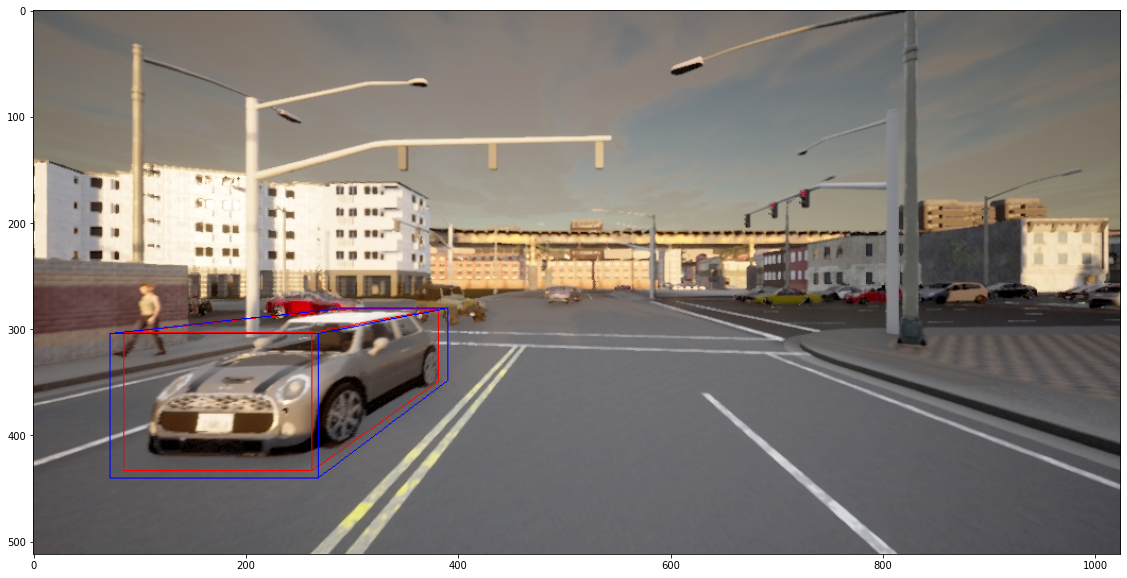

In [13]:
video_num = 0
picture_num = 78
box_num = 11

cropped_depth, startpoint, BB_num = crop_all_BBs(labels[video_num][picture_num], depths[video_num][picture_num], segs[video_num][picture_num], 305)
testImage = images[video_num][picture_num].copy()
min_x, max_x, min_y, max_y, min_z, max_z = search_min_max_coordinates(cropped_depth[box_num], startpoint[box_num])
draw_3D_BB(testImage, min_x, max_x, min_y, max_y, min_z, max_z, (255,0,0), 1)
draw_3D_BB(testImage, labels[video_num][picture_num][box_num][5], labels[video_num][picture_num][box_num][6], labels[video_num][picture_num][box_num][7], labels[video_num][picture_num][box_num][8], labels[video_num][picture_num][box_num][9], labels[video_num][picture_num][box_num][10], (0,0,255), 1)
IoU_score = calculate_IoU((labels[video_num][picture_num][box_num][5], labels[video_num][picture_num][box_num][7], labels[video_num][picture_num][box_num][9]), (labels[video_num][picture_num][box_num][6], labels[video_num][picture_num][box_num][8], labels[video_num][picture_num][box_num][10]), (min_x, min_y, min_z), (max_x, max_y, max_z))
plt.figure(figsize=(20,10))
plt.imshow(testImage)
print("IoU_score:", IoU_score)
